<a href="https://colab.research.google.com/github/hasali-coder/USD-KES-Price-Prediction-Project/blob/main/USD_Kenyan_Shilling_Analysis_%26_Prediction_(Jan_1st_2024_Jan_25th_2024).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px


In [49]:
df = pd.read_csv("/content/USD_KES_Historica_2.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,01/25/2024,163.00,163.50,163.5,162.65,NaN,0.15%
1,01/24/2024,162.75,163.00,163.5,162.15,NaN,0.15%
2,01/23/2024,162.50,162.50,163.0,161.75,NaN,0.31%
3,01/22/2024,162.00,162.00,162.5,161.40,NaN,0.31%
4,01/19/2024,161.50,161.75,162.0,161.30,NaN,0.16%


In [50]:
df = df.drop('Vol.', axis = 1)

In [51]:
df.head()

,Date,Price,Open,High,Low,Change %
0,01/25/2024,163.00,163.50,163.5,162.65,0.15%
1,01/24/2024,162.75,163.00,163.5,162.15,0.15%
2,01/23/2024,162.50,162.50,163.0,161.75,0.31%
3,01/22/2024,162.00,162.00,162.5,161.40,0.31%
4,01/19/2024,161.50,161.75,162.0,161.30,0.16%


In [52]:
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

In [53]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
statistics = df[numerical_columns].describe()
print(statistics)

            Price        Open        High         Low
count   19.000000   19.000000   19.000000   19.000000
mean   159.373158  159.507737  160.088421  158.986684
std      2.228669    2.190124    2.174663    2.084191
min    156.500000  157.000000  157.500000  156.450000
25%    157.470000  157.525000  157.925000  157.323500
50%    159.000000  159.500000  159.750000  158.250000
75%    161.375000  161.375000  161.875000  160.900000
max    163.000000  163.500000  163.500000  162.650000


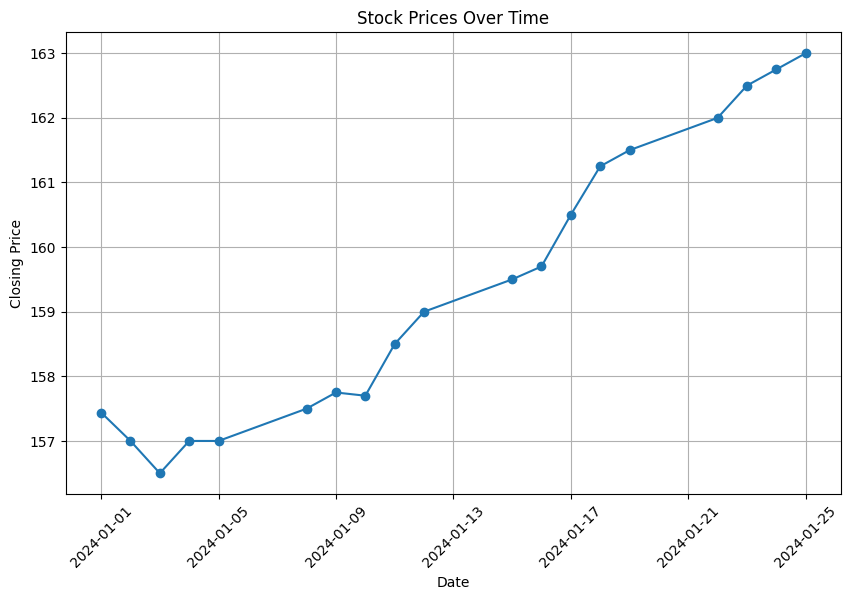

In [54]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], marker='o', linestyle='-')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [55]:
#days with the highest percentage gains or losses
df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Change %'] = pd.to_numeric(df['Change %'].str.strip('%'))
max_gain_day = df.loc[df['Change %'].idxmax()]
max_loss_day = df.loc[df['Change %'].idxmin()]
print("Day with the highest percentage gain:")
print(max_gain_day[['Date', 'Change %']])

print("\nDay with the highest percentage loss:")
print(max_loss_day[['Date', 'Change %']])

Day with the highest percentage gain:
Date        2024-01-01 00:00:00
Change %                    0.6
Name: 18, dtype: object

Day with the highest percentage loss:
Date        2024-01-03 00:00:00
Change %                  -0.32
Name: 16, dtype: object


In [56]:
#daily price changes and volatility analysis
df['Daily Change %'] = df['Price'].pct_change() * 100
volatility = df['Daily Change %'].std()
print("Daily Price Changes:")
print(df[['Date', 'Price', 'Daily Change %']])

print("\nVolatility (Standard Deviation of Daily Changes):")
print(volatility)

Daily Price Changes:
         Date   Price  Daily Change %
0  2024-01-25  163.00             NaN
1  2024-01-24  162.75       -0.153374
2  2024-01-23  162.50       -0.153610
3  2024-01-22  162.00       -0.307692
4  2024-01-19  161.50       -0.308642
5  2024-01-18  161.25       -0.154799
6  2024-01-17  160.50       -0.465116
7  2024-01-16  159.70       -0.498442
8  2024-01-15  159.50       -0.125235
9  2024-01-12  159.00       -0.313480
10 2024-01-11  158.50       -0.314465
11 2024-01-10  157.70       -0.504732
12 2024-01-09  157.75        0.031706
13 2024-01-08  157.50       -0.158479
14 2024-01-05  157.00       -0.317460
15 2024-01-04  157.00        0.000000
16 2024-01-03  156.50       -0.318471
17 2024-01-02  157.00        0.319489
18 2024-01-01  157.44        0.280255

Volatility (Standard Deviation of Daily Changes):
0.23467916841353734


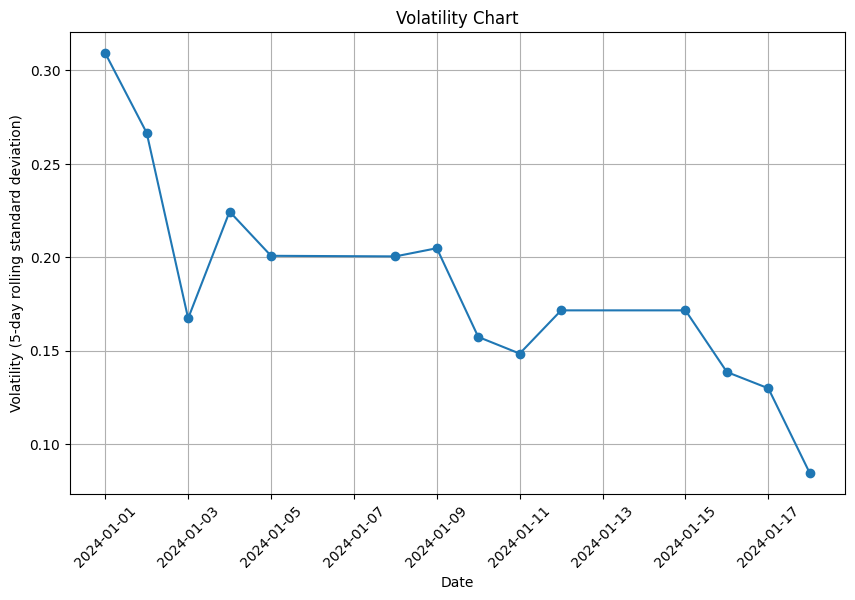

In [59]:
df['Daily Change %'] = df['Price'].pct_change() * 100
df['Volatility'] = df['Daily Change %'].rolling(window=5).std()
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Volatility'], marker='o', linestyle='-')
plt.title('Volatility Chart')
plt.xlabel('Date')
plt.ylabel('Volatility (5-day rolling standard deviation)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [60]:
#daily price movements (High - Low)
df['Daily Range'] = df['High'] - df['Low']
df['Daily Change %'] = df['Price'].pct_change() * 100 #daily percentage change
threshold = 1.0  # Adjust the threshold as needed
significant_moves = df[abs(df['Daily Change %']) > threshold]

print("Days with Significant Price Movements:")
print(significant_moves[['Date', 'Daily Range', 'Daily Change %']])

Days with Significant Price Movements:
Empty DataFrame
Columns: [Date, Daily Range, Daily Change %]
Index: []


In [61]:
#daily percentage change
mean_change = df['Daily Change %'].mean()
std_dev_change = df['Daily Change %'].std()
max_change = df['Daily Change %'].max()
min_change = df['Daily Change %'].min()
print("Summary Statistics for Daily Percentage Change:")
print(f"Mean Change: {mean_change:.2f}%")
print(f"Standard Deviation: {std_dev_change:.2f}%")
print(f"Maximum Change: {max_change:.2f}% on {df.loc[df['Daily Change %'].idxmax()]['Date'].strftime('%Y-%m-%d')}")
print(f"Minimum Change: {min_change:.2f}% on {df.loc[df['Daily Change %'].idxmin()]['Date'].strftime('%Y-%m-%d')}")

Summary Statistics for Daily Percentage Change:
Mean Change: -0.19%
Standard Deviation: 0.23%
Maximum Change: 0.32% on 2024-01-02
Minimum Change: -0.50% on 2024-01-10


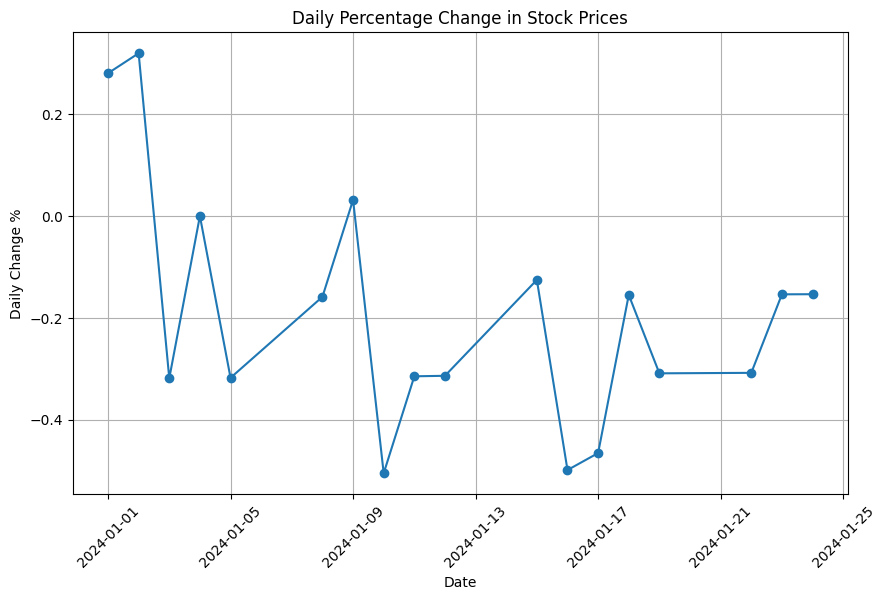

In [62]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Daily Change %'], marker='o', linestyle='-')
plt.title('Daily Percentage Change in Stock Prices')
plt.xlabel('Date')
plt.ylabel('Daily Change %')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [63]:
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                                     open=df['Open'],
                                     high=df['High'],
                                     low=df['Low'],
                                     close=df['Price'])])
fig.update_layout(title='Candlestick Chart - Stock Price Movements',
                  xaxis_title='Date',
                  yaxis_title='Stock Price',
                  xaxis_rangeslider_visible=False)

fig.show()

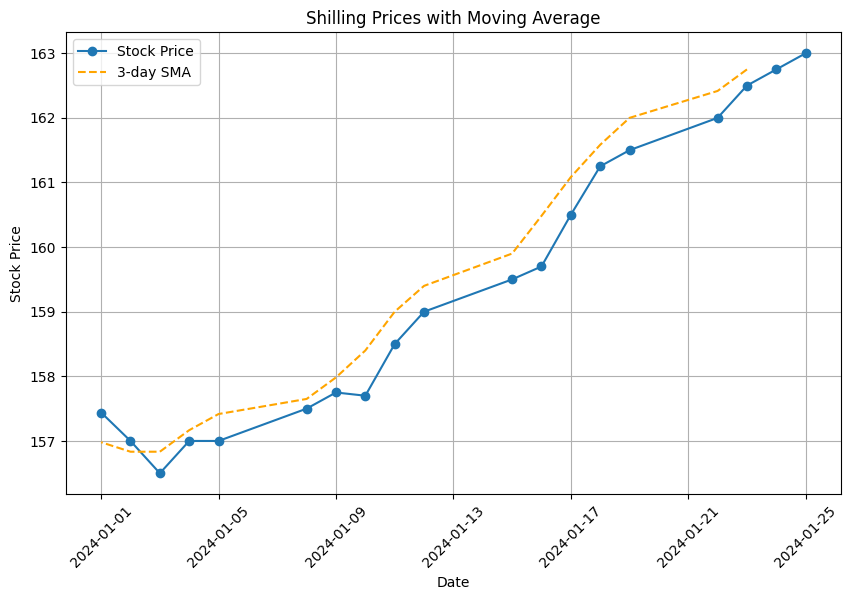

In [64]:
window = 3
df['SMA'] = df['Price'].rolling(window=window).mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Stock Price', marker='o', linestyle='-')
plt.plot(df['Date'], df['SMA'], label=f'{window}-day SMA', linestyle='--', color='orange')

plt.title('Shilling Prices with Moving Average')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

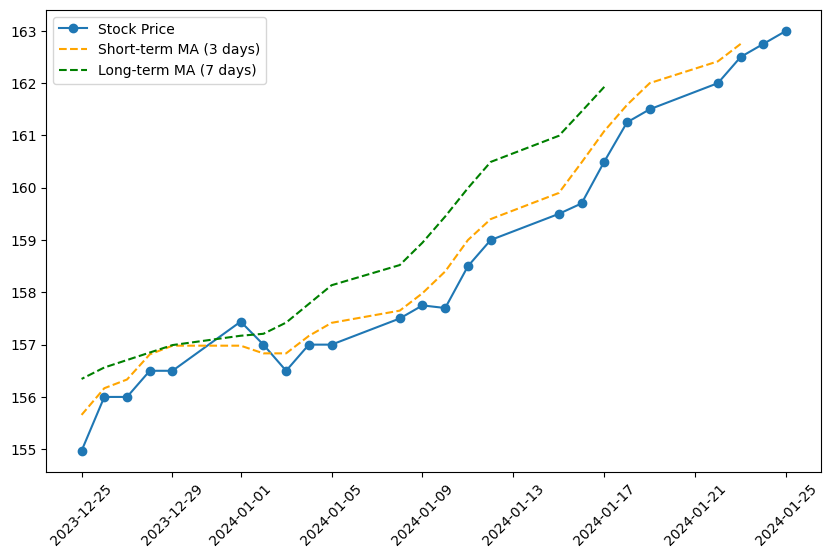

In [30]:
#chat patterns to identify potential trend reversals
short_window = 3
long_window = 7
df['Short_MA'] = df['Price'].rolling(window=short_window).mean()
df['Long_MA'] = df['Price'].rolling(window=long_window).mean()
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Stock Price', marker='o', linestyle='-')
plt.plot(df['Date'], df['Short_MA'], label=f'Short-term MA ({short_window} days)', linestyle='--', color='orange')
plt.plot(df['Date'], df['Long_MA'], label=f'Long-term MA ({long_window} days)', linestyle='--', color='green')
plt.xticks(rotation=45)
plt.legend()

Historical Volatility: 0.23%


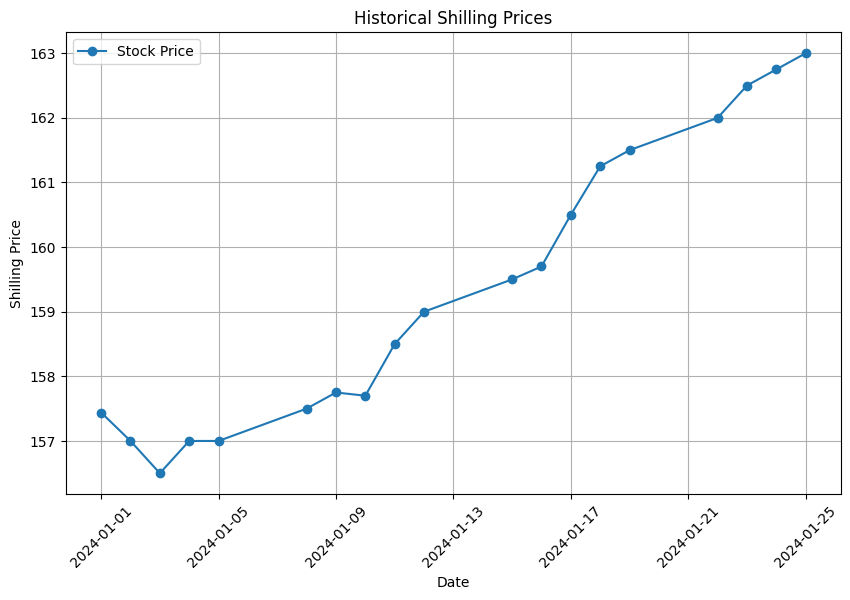

In [65]:
#risk assesment by analyzing historical price fluctuations and volatility.
df['Date'] = pd.to_datetime(df['Date'])
df['Daily Change %'] = df['Price'].pct_change() * 100
historical_volatility = df['Daily Change %'].std()

print(f"Historical Volatility: {historical_volatility:.2f}%")

plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Stock Price', marker='o', linestyle='-')
plt.title('Historical Shilling Prices')
plt.xlabel('Date')
plt.ylabel('Shilling Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [67]:
# 95% VaR
confidence_level = 0.95
var_95 = df['Daily Change %'].quantile(1 - confidence_level)
print(f"95% VaR: {var_95:.2f}%")


95% VaR: -0.50%


In [68]:
#next 3 months prediction
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
X = df[['DayOfWeek', 'Month']].values
y = df['Price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse: .2f}")

Mean Squared Error:  6.97


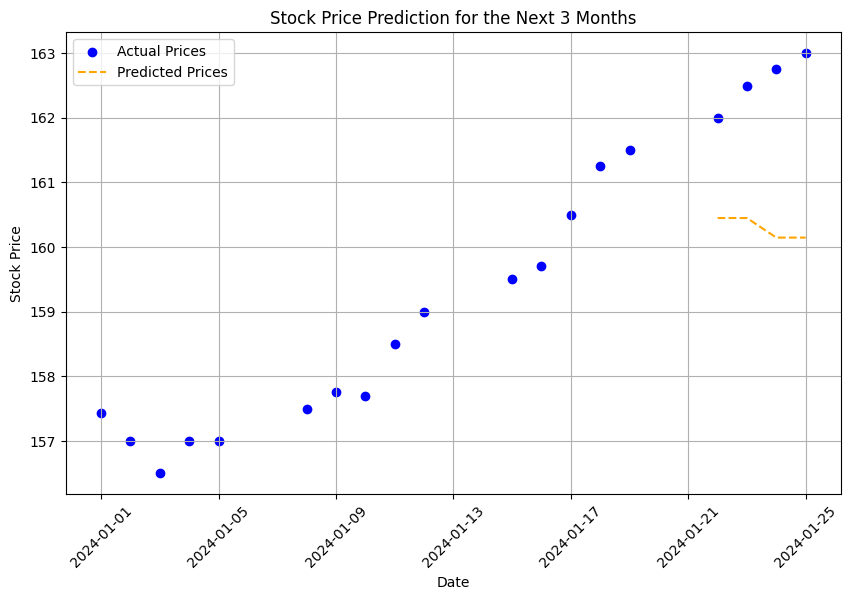

In [69]:
#visualizing the predictions
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Price'], label='Actual Prices', marker='o', color='blue')
plt.plot(df['Date'].iloc[len(X_train):], y_pred, label='Predicted Prices', linestyle='--', color='orange')
plt.title('Stock Price Prediction for the Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [70]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 2.64


In [71]:
#RandomForest Model
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
print(f"Root Mean Squared Error(Random Forest): {rmse_rf:.2f}")

Root Mean Squared Error(Random Forest): 2.79


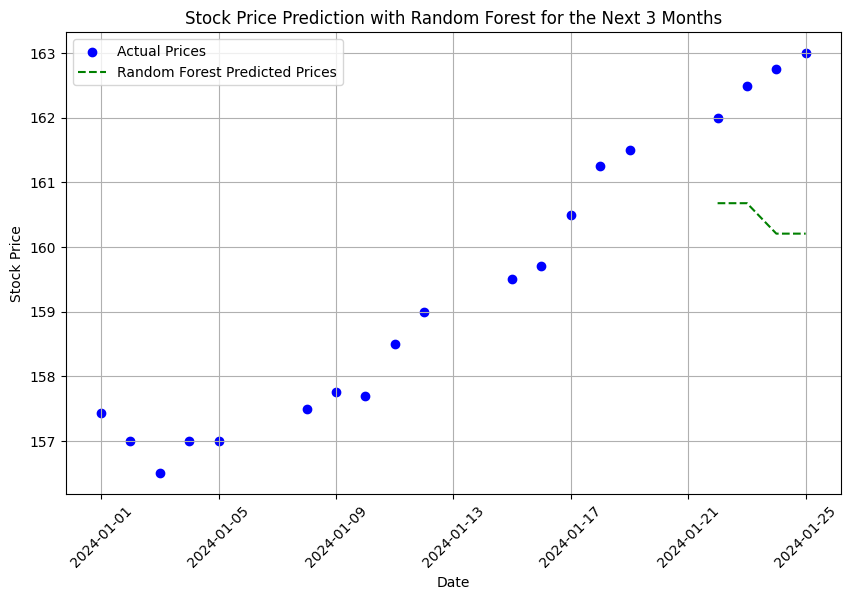

In [72]:
#Random forest classifier prediction visualization
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Price'], label='Actual Prices', marker='o', color='blue')
plt.plot(df['Date'].iloc[len(X_train):], y_pred_rf, label='Random Forest Predicted Prices', linestyle='--', color='green')
plt.title('Stock Price Prediction with Random Forest for the Next 3 Months')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but RandomForestRegressor was fitted without feature names



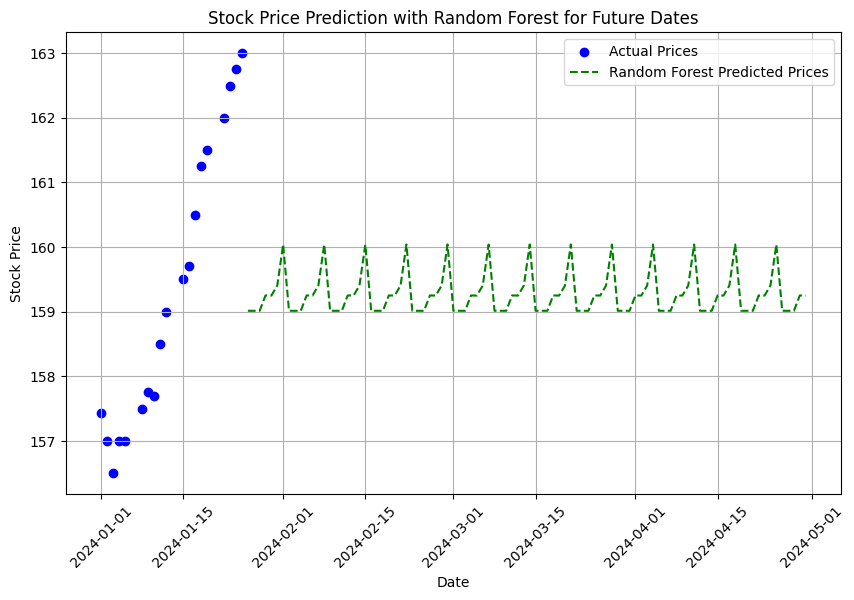

         Date  Predicted Price
0  2024-01-26       159.014333
1  2024-01-27       159.014333
2  2024-01-28       159.014333
3  2024-01-29       159.251961
4  2024-01-30       159.249701
..        ...              ...
91 2024-04-26       159.014333
92 2024-04-27       159.014333
93 2024-04-28       159.014333
94 2024-04-29       159.251961
95 2024-04-30       159.249701

[96 rows x 2 columns]


In [73]:
from sklearn.ensemble import RandomForestRegressor
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month

X = df[['DayOfWeek', 'Month']].values
y = df['Price'].values
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X, y)
#future dates for prediction
future_dates = pd.date_range(start='2024-01-26', end='2024-04-30', freq='D')
future_features = pd.DataFrame({'Date': future_dates, 'DayOfWeek': future_dates.dayofweek, 'Month': future_dates.month})
predicted_prices = model_rf.predict(future_features[['DayOfWeek', 'Month']])
predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted Price': predicted_prices})

#visualize the predictions
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Price'], label='Actual Prices', marker='o', color='blue')
plt.plot(predictions_df['Date'], predictions_df['Predicted Price'], label='Random Forest Predicted Prices', linestyle='--', color='green')
plt.title('Stock Price Prediction with Random Forest for Future Dates')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

#predictions DataFrame
print(predictions_df)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but SVR was fitted without feature names



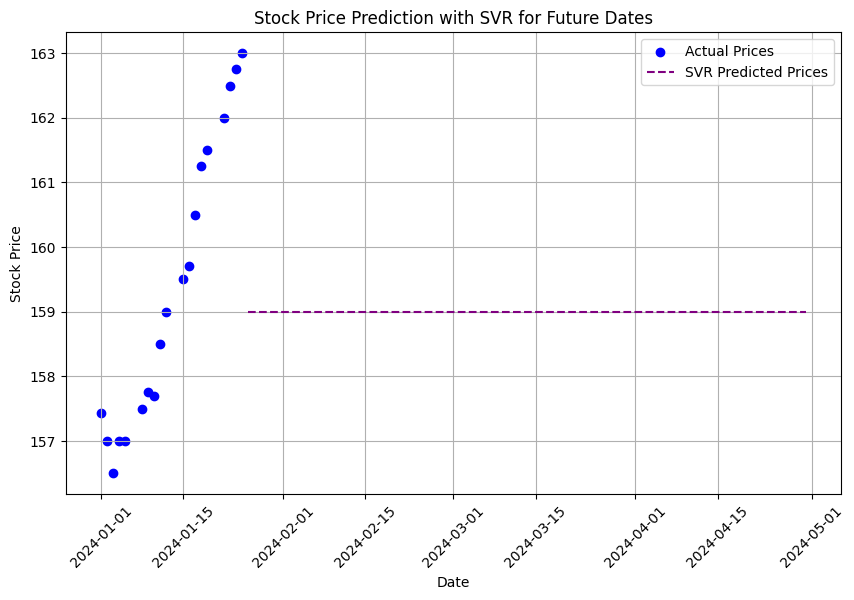

         Date  Predicted Price (SVR)
0  2024-01-26                  159.0
1  2024-01-27                  159.0
2  2024-01-28                  159.0
3  2024-01-29                  159.0
4  2024-01-30                  159.0
..        ...                    ...
91 2024-04-26                  159.0
92 2024-04-27                  159.0
93 2024-04-28                  159.0
94 2024-04-29                  159.0
95 2024-04-30                  159.0

[96 rows x 2 columns]


In [74]:
#Support Vector Regressor model (SVR Model )
from sklearn.svm import SVR
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by='Date')
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['Month'] = df['Date'].dt.month
X = df[['DayOfWeek', 'Month']].values
y = df['Price'].values
model_svr = SVR(kernel='linear')
model_svr.fit(X, y)
future_dates = pd.date_range(start='2024-01-26', end='2024-04-30', freq='D')
future_features = pd.DataFrame({'DayOfWeek': future_dates.dayofweek, 'Month': future_dates.month})
predicted_prices_svr = model_svr.predict(future_features)
predictions_df_svr = pd.DataFrame({'Date': future_dates, 'Predicted Price (SVR)': predicted_prices_svr})
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Price'], label='Actual Prices', marker='o', color='blue')
plt.plot(predictions_df_svr['Date'], predictions_df_svr['Predicted Price (SVR)'], label='SVR Predicted Prices', linestyle='--', color='purple')
plt.title('Stock Price Prediction with SVR for Future Dates')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
print(predictions_df_svr)

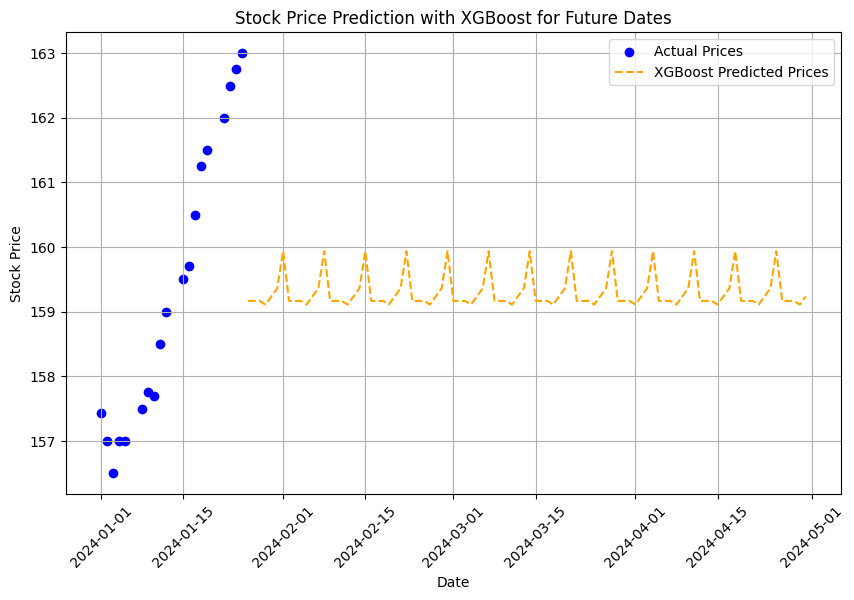

         Date  Predicted Price (XGBoost)
0  2024-01-26                 159.167114
1  2024-01-27                 159.167114
2  2024-01-28                 159.167114
3  2024-01-29                 159.110474
4  2024-01-30                 159.237518
..        ...                        ...
91 2024-04-26                 159.167114
92 2024-04-27                 159.167114
93 2024-04-28                 159.167114
94 2024-04-29                 159.110474
95 2024-04-30                 159.237518

[96 rows x 2 columns]


In [76]:
#XGBoost Model
import xgboost as xgb
model_xgb = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators=100, random_state=42)
model_xgb.fit(X, y)
future_dates = pd.date_range(start='2024-01-26', end='2024-04-30', freq='D')
future_features = pd.DataFrame({'DayOfWeek': future_dates.dayofweek, 'Month': future_dates.month})
predicted_prices_xgb = model_xgb.predict(future_features)
predictions_df_xgb = pd.DataFrame({'Date': future_dates, 'Predicted Price (XGBoost)': predicted_prices_xgb})
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Price'], label='Actual Prices', marker='o', color='blue')
plt.plot(predictions_df_xgb['Date'], predictions_df_xgb['Predicted Price (XGBoost)'], label='XGBoost Predicted Prices', linestyle='--', color='orange')
plt.title('Stock Price Prediction with XGBoost for Future Dates')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()
print(predictions_df_xgb)